###  Wage Data Analysis
In this application (which we refer to as the Wage data set throughout this
book), we examine a number of factors that relate to wages for a group of
males from the Atlantic region of the United States. In particular, we wish
to understand the association between an employee’s age and education, as
well as the calendar year, on his wage. Consider, for example, the left-hand
panel of Figure 1.1, which displays wage versus age for each of the individuals
in the data set. There is evidence that wage increases with age but then
decreases again after approximately age 60. The blue line, which provides
an estimate of the average wage for a given age, makes this trend clearer.

In [86]:
import pandas as pd
data=pd.read_csv('wages.csv')

In [87]:
data.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.32,75.04
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.26,70.48
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.88,130.98
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.04,154.69
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.32,75.04


In [88]:
data.describe()

,year,age,logwage,wage
count,3000.00,3000.00,3000.00,3000.00
mean,2005.79,42.41,4.65,111.70
std,2.03,11.54,0.35,41.73
min,2003.00,18.00,3.00,20.09
25%,2004.00,33.75,4.45,85.38
50%,2006.00,42.00,4.65,104.92
75%,2008.00,51.00,4.86,128.68
max,2009.00,80.00,5.76,318.34


In [89]:
data.dtypes[data.dtypes==object]

sex           object
maritl        object
race          object
education     object
region        object
jobclass      object
health        object
health_ins    object
dtype: object

In [90]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.precision',3)

In [91]:
data.groupby(by='race')['age','wage'].mean()

,age,wage
race,,
1. White,42.39,112.56
2. Black,43.56,101.60
3. Asian,41.82,120.29
4. Other,37.70,89.97


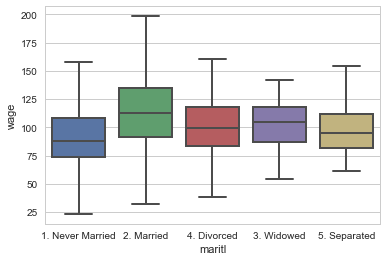

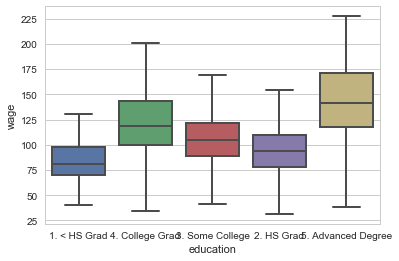

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
#fig, axs = plt.subplots(1,2)
axs=sns.boxplot(x='maritl', y='wage', data=data,showfliers=False,linewidth=2) #ax =
plt.show()
axs2=sns.boxplot(x='education', y='wage', data=data,showfliers=False,linewidth=2)
plt.show()
#display(ax)

Linear Regression

In [93]:
# divide the data into test and train data
from sklearn.model_selection import train_test_split
data_y=data['wage']
data_x=data[['age','race','education','maritl','health','jobclass']]
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

In [94]:
# handle the categorical variables through patsy
# Fitting linear regression model
from sklearn.linear_model import LinearRegression
from patsy import dmatrices, dmatrix
c=dmatrix("train_x['age']+train_x['race']+train_x['education']+train_x['jobclass']+\
            train_x['maritl']+train_x['health']-1",train_x)
model = LinearRegression()
model.fit(c,train_y)
print(model.coef_)
print(model.intercept_)

[  4.3811387    0.94412052   2.06640791  -7.39166713  10.1653079
  21.33083198  35.44900086  60.51695761   5.71240768  17.38925058
  -0.10191786   3.62398662  11.80485451   5.49775874   0.34513129]
49.5731413675


In [95]:
# Prediction on validation dataset
d=dmatrix("valid_x['age']+valid_x['race']+valid_x['education']+valid_x['jobclass']\
            + valid_x['maritl']+valid_x['health']-1",valid_x)
pred = model.predict(d)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)


34.55035914767023


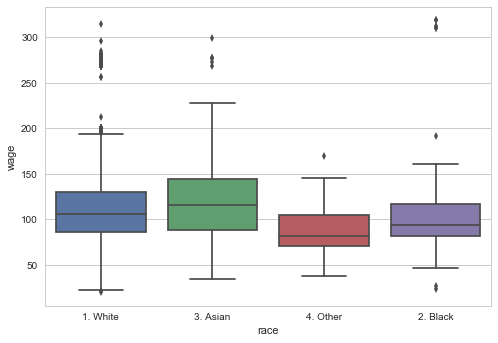

In [96]:
# 3D Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="race", y="wage", data=data)


Polynomial Regression

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
c_ = poly.fit_transform(c)
clf = linear_model.LinearRegression()
clf.fit(c_, train_y)
#print(clf.coef_);

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
d_=poly.fit_transform(d)
pred = clf.predict(d_)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid_y, pred))
print(rms)

34.30255123883968


Using Splines